In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '../static/datasets/modified/'
bin_folder = 'bin_classification/'
multi_folder = 'multi_classification/'

In [3]:
bin_train_data = pd.read_csv('../static/datasets/original/train_data.csv', sep='\t')
bin_validation_data = pd.read_csv('../static/datasets/original/validation_data_labeled.csv', sep='\t')

In [4]:
columns = ['sentence', 'label']
bin_train_data = bin_train_data[bin_train_data['label'] != 0][columns]
bin_validation_data = bin_validation_data[bin_validation_data['label'] != 0][columns]

In [5]:
bin_train_data['label'].where(~(bin_train_data.label < 0), other=0, inplace=True)
bin_validation_data['label'].where(~(bin_validation_data.label < 0), other=0, inplace=True)

bin_train_data.sample(n=bin_train_data.shape[0], replace=True, random_state=42)
bin_validation_data.sample(n=bin_validation_data.shape[0], replace=True, random_state=42)

bin_train_data.set_index(np.arange(bin_train_data.shape[0]))

,sentence,label
0,Представитель талибов Забиулла Муджахид в твит...,0
1,"По словам Мнучина, «Мадуро цепляется за Кубу, ...",0
2,Поводом для возможного задержания якобы стали ...,0
3,27 октября боевики «Талибана» совершили нападе...,0
4,Apple и Samsung нарушали патенты друг друга,0
...,...,...
1858,"Его адвокат заявил агентству Reuters, что он б...",1
1859,Выступление легендарного рокера прошло в магаз...,1
1860,"Суд присяжных заседателей в Лос-Анджелесе, шта...",0
1861,Отсутствие официальной реакции со стороны амер...,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


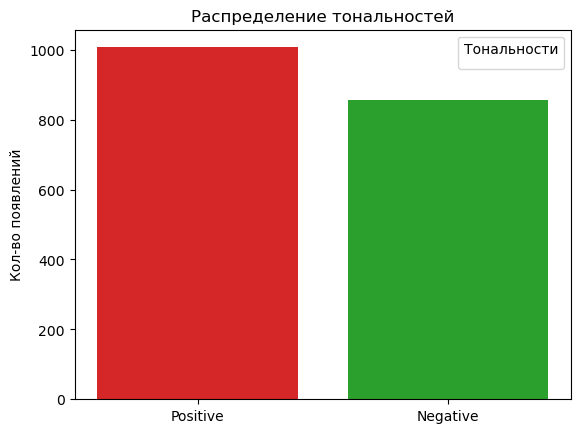

In [6]:
fig, ax = plt.subplots()

labels = ['Positive', 'Negative']
counts = bin_train_data['label'].value_counts().tolist()
bar_colors = ['tab:red', 'tab:green']

ax.bar(labels, counts, color=bar_colors)

ax.set_ylabel('Кол-во появлений')
ax.set_title('Распределение тональностей')
ax.legend(title='Тональности')

plt.show()

In [7]:
bin_train_data.to_csv(path + bin_folder + 'train_data.csv')
bin_validation_data.to_csv(path + bin_folder + 'validation_data.csv')

In [8]:
bin_train_data = pd.read_csv('../static/datasets/original/train_data.csv', sep='\t')
bin_validation_data = pd.read_csv('../static/datasets/original/validation_data_labeled.csv', sep='\t')

In [9]:
bin_train_data.entity_tag.value_counts()

PERSON          1934
PROFESSION      1666
ORGANIZATION    1487
COUNTRY         1274
NATIONALITY      276
Name: entity_tag, dtype: int64

In [10]:
NER_essences = ['PERSON','PROFESSION','ORGANIZATION','COUNTRY','NATIONALITY']

In [11]:
NER_essences = (NER_essences, bin_train_data['entity_tag'].value_counts().tolist())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


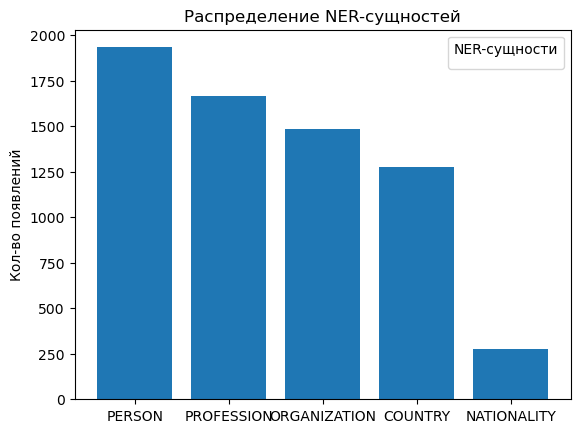

In [12]:
fig, ax = plt.subplots()

labels = NER_essences[0]
counts = NER_essences[1]

ax.bar(labels, counts)

ax.set_ylabel('Кол-во появлений')
ax.set_title('Распределение NER-сущностей')
ax.legend(title='NER-сущности')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


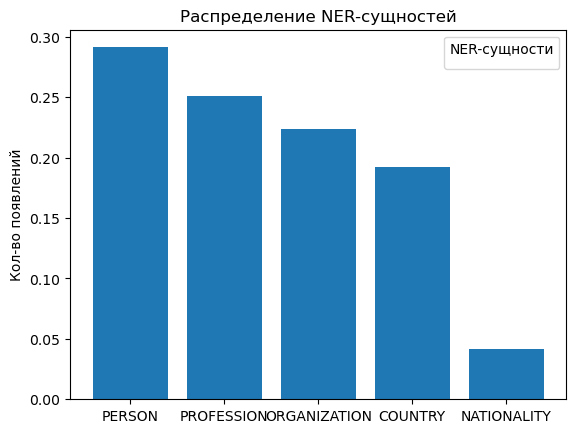

In [13]:
fig, ax = plt.subplots()

labels = NER_essences[0]
counts = np.array(NER_essences[1]) / bin_train_data.shape[0]

ax.bar(labels, counts)

ax.set_ylabel('Кол-во появлений')
ax.set_title('Распределение NER-сущностей')
ax.legend(title='NER-сущности')

plt.show()

In [14]:
bin_train_data.head()

,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label
0,"Джеймс «Бадди» Макгирт (James (Buddy) McGirt, ...",спортсмена,PROFESSION,86,96,0
1,«За всю нашу долгую карьеру нам довелось играт...,музыкантов,PROFESSION,258,268,0
2,"Ранее, 7 декабря, толпа болельщиков перекрыла ...",Егоре Свиридове,PERSON,175,190,0
3,"В субботу, 21 июля 2018 года, на арене СК «Оли...",россиянина,NATIONALITY,122,132,0
4,Представитель талибов Забиулла Муджахид в твит...,американских захватчика,PROFESSION,109,132,-1


In [15]:
sentences = dict()
for s in bin_train_data.sentence:
    if len(s) not in sentences.keys():
        sentences[len(s)] = 0
    sentences[len(s)] += 1

lengths = list(sentences.keys())
grid = list(sentences.values())

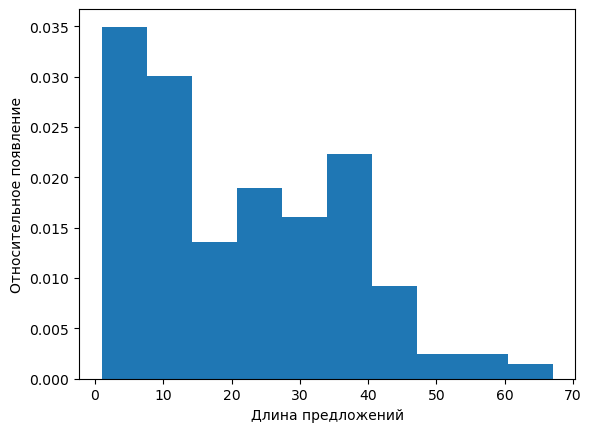

In [16]:
plt.figure()
plt.hist(grid, density=True)
plt.ylabel('Относительное появление')
plt.xlabel('Длина предложений')
plt.show()